# Part 1 ‐ Exploratory data analysis
Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. 
* Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.
* Please report/illustrate important features of the demand, such as daily cycles. 
* If there are data quality issues, please report them.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
logins = pd.read_json('./ultimate_challenge/logins.json')
print(logins['login_time'].dtypes)
logins

datetime64[ns]


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [3]:
# no missing data 
null = logins.isnull().sum()
null

login_time    0
dtype: int64

In [4]:
# set index to the time series
logins = logins.set_index('login_time')
type(logins)

pandas.core.frame.DataFrame

In [5]:
logins['count'] = 1
logins

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [6]:
logins_15 = logins.resample('15T').count()
logins_15

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [7]:
# Sanity Check
# Define the start and end timestamps
start_timestamp = pd.Timestamp('1970-01-01 20:00:00')
end_timestamp = pd.Timestamp('1970-04-13 19:00:00')

# Create a date range with 15-minute intervals between the start and end timestamps
date_range = pd.date_range(start=start_timestamp, end=end_timestamp, freq='15T')

# Calculate the number of 15-minute intervals
num_intervals = len(date_range)

print("Number of 15-minute intervals:", num_intervals)

Number of 15-minute intervals: 9789


In [8]:
logins_15.loc[logins_15['count'] == 0]

,count
login_time,
1970-01-01 21:30:00,0
1970-01-02 04:15:00,0
1970-01-02 06:15:00,0
1970-01-02 18:00:00,0
1970-01-03 08:45:00,0
...,...
1970-04-11 08:45:00,0
1970-04-13 05:30:00,0
1970-04-13 06:00:00,0


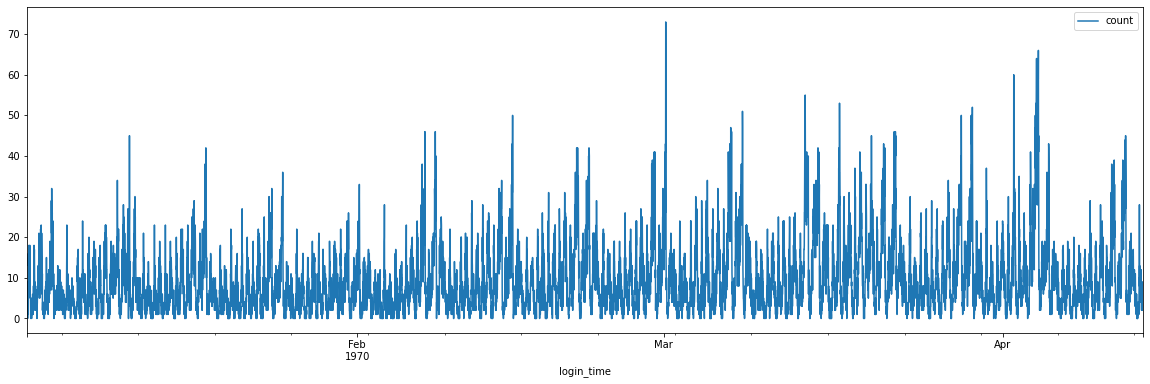

In [9]:
# there don't appear to be any missing chunks of time 
fig, ax = plt.subplots(figsize=(20, 6))
logins_15.plot(ax=ax)
plt.show()

Definitely some patterns to be uncovered here! March had a VERY high login count at one point. 

In [10]:
# 0=Monday
logins_15['day_of_week'] = logins_15.index.dayofweek

logins_15['month'] = logins_15.index.month

logins_15['day_of_month'] = logins_15.index.day

logins_15

,count,day_of_week,month,day_of_month
login_time,,,,
1970-01-01 20:00:00,2,3,1,1
1970-01-01 20:15:00,6,3,1,1
1970-01-01 20:30:00,9,3,1,1
1970-01-01 20:45:00,7,3,1,1
1970-01-01 21:00:00,1,3,1,1
...,...,...,...,...
1970-04-13 17:45:00,5,0,4,13
1970-04-13 18:00:00,5,0,4,13
1970-04-13 18:15:00,2,0,4,13


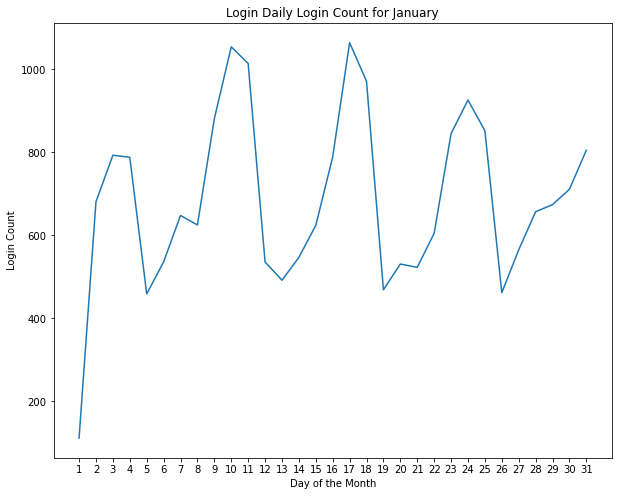

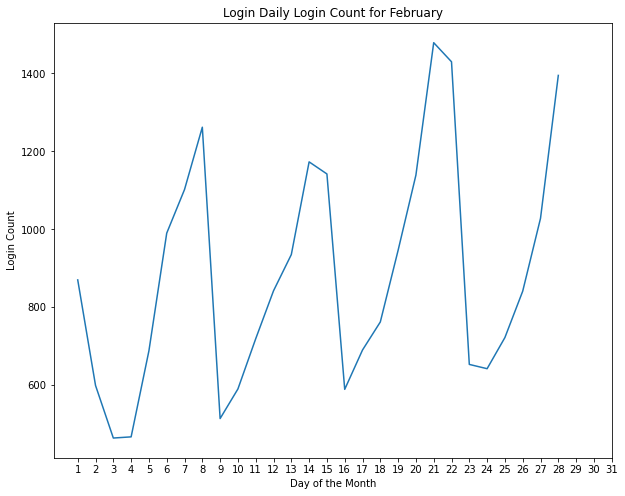

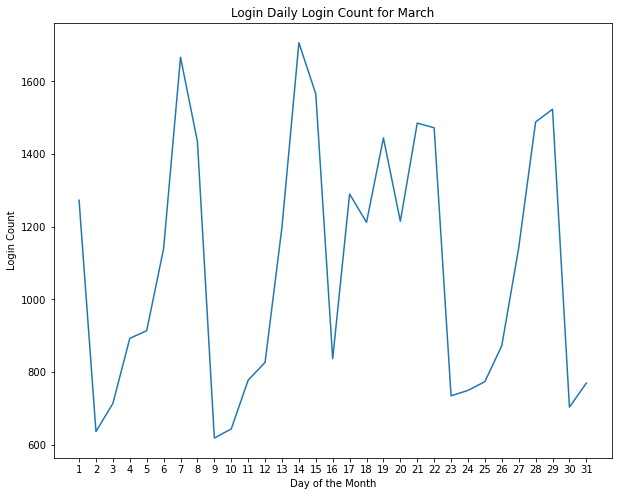

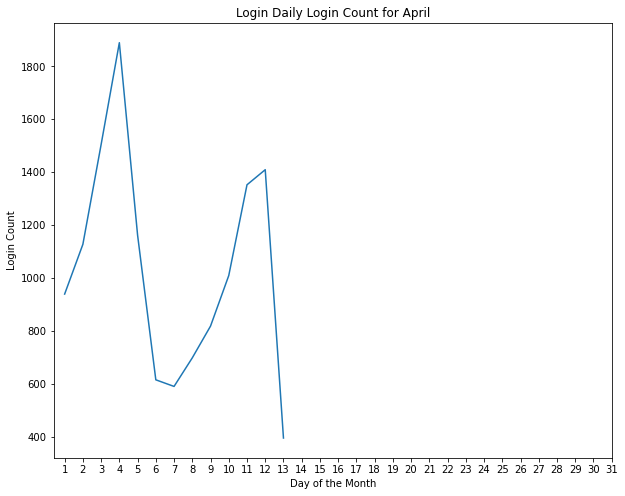

In [11]:
january = logins_15.loc['1970-01']
february = logins_15.loc['1970-02']
march = logins_15.loc['1970-03']
april = logins_15.loc['1970-04']

months = [january, february, march, april]

for month in months:
    plt.figure(figsize=(10, 8))
    # group by day, average count/day
    count_daily = month.groupby(month.index.day)['count'].sum()
    plt.plot(count_daily.index, count_daily)
    plt.xlabel('Day of the Month')
    plt.ylabel('Login Count')

    # Set the x-axis ticks for consistency
    plt.xticks(range(1, 32))
    month_name = month.index[0].strftime('%B')
    plt.title(f"Login Daily Login Count for {month_name}")
    plt.show();

In [20]:
january.loc[january['day_of_month'] == 1, 'count'].sum()

112

Doesn't look like we're missing any days other than we only have the first half of April (up to the 13th). I'd be interested to see some other breakdowns like:
* Average hourly in day for the whole dataset
* average hourly in day for each month
* average daily in a week for the whole dataset
* average daily in a week for each month 

In [17]:
(logins_15.loc[logins_15.index.hour == 1, 'count'].sum()) / len(logins_15.loc[logins_15.index.hour == 1])

15.482843137254902

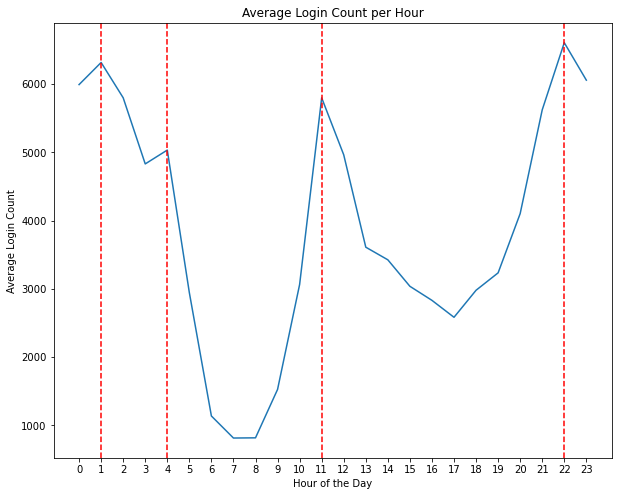

In [13]:
# Calculate the all-time average login counts per hour in a day
# What does the average day look like?
average_hourly = logins_15.groupby(logins_15.index.hour)['count'].sum()


# Plot the average login counts per hour
plt.figure(figsize=(10, 8))
plt.plot(average_hourly.index, average_hourly)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Login Count')
plt.title('Average Login Count per Hour')

# Set the x-axis ticks to show all 24 hours
plt.xticks(range(0, 24))

# Add vertical lines at the four highest points
for index in [1, 4, 11, 22]:
    plt.axvline(x=index, color='red', linestyle='--')

plt.show();

# Notes:
Peaks seem to be at 1am, 4am, 11am, and 10pm. 
Considerable lull period between 6am-9am, under 5 logins per hour. 
Noon to 8pm is slow, but not as dead as that morning lull. 

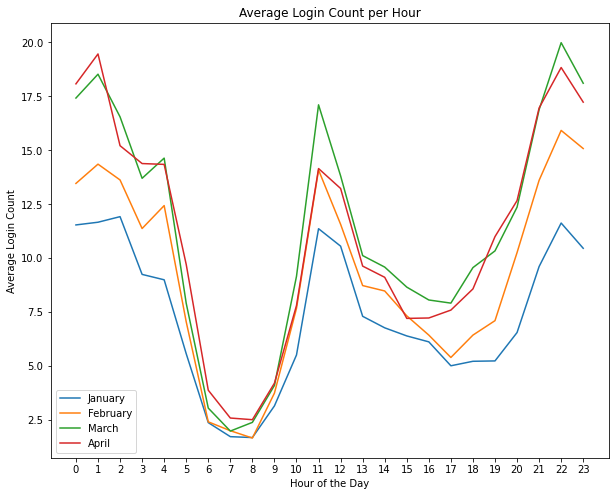

In [14]:
# Calculate the monthly average login counts per hour in a day
# What does the average day look like in each month?
plt.figure(figsize=(10, 8))

for month in months:
    # Group by day and calculate the average count per hour
    average_hourly = month.groupby(month.index.hour)['count'].mean()
    
    # Extract month name for the legend
    month_name = month.index[0].strftime('%B')
    
    # Plot the average login counts per hour for each month
    plt.plot(average_hourly.index, average_hourly, label=month_name)

plt.xlabel('Hour of the Day')
plt.ylabel('Average Login Count')
plt.title('Average Login Count per Hour')
plt.xticks(range(24))

# Add a legend with month names
plt.legend()

plt.show()

## Notes:
The general shape seems consistent across months, though March generally saw the most logins, which is consistent with the first plot we did of the 15-min intervals. 
* Logins seem to peak at 12:30am, 11am, and 9:30pm. And a baby peak at 4am on it's way down to the morning lull. 
* Slowest part of the day is definitely 5:30am-9am before it starts to pick up for the 11am peak. 
* Between the 11am and 9:30pm peaks, there is definitely an afternoon/evening lull (with the lowest being around 4:30pm), but not as dead the morning lull and it quickly starts picking up for the 9:30pm peak. 

This is all consistent with the all-time hourly plot. 

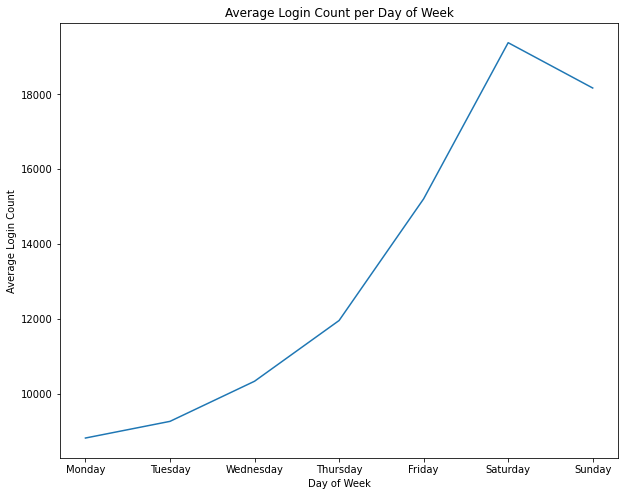

In [15]:
average_day_of_w = logins_15.groupby(logins_15.index.dayofweek)['count'].sum()


# Plot the average login counts per hour
plt.figure(figsize=(10, 8))
plt.plot(average_day_of_w.index, average_day_of_w)
plt.xlabel('Day of Week')
plt.ylabel('Average Login Count')
plt.title('Average Login Count per Day of Week')

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Set the x-axis ticks to show all 24 hours
plt.xticks(range(7), days_of_week)

plt.show();

In [16]:
average_day_of_w

login_time
0     8823
1     9268
2    10339
3    11960
4    15208
5    19377
6    18167
Name: count, dtype: int64